In [3]:
import sys
sys.path.append("../")

In [4]:
from scipy import special
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from delay.delay import *
import delay.model as model

import delay.calculator as calc
from delay.strategy import fA_HardInterval, fB_HardInterval, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence
from delay.value import calculateValue

In [1]:
def printNice(h, digits = 2):
    h = [round(x, ndigits=digits) for x in h]
    for i in range(int(len(x)/10)):
        print(h[slice(i*10, (i+1)*10)])

In [2]:
simulation = Simulation(FunctionType.HARD_INTERVAL, (10, 0), calculateValue, calc.linear(N=50, w=0.99))
simulation.setN(50)
simulation.setConv(100)
simulation.setDuration(10000000) # 10^7
simulation.setD(15)
simulation.run()

NameError: name 'Simulation' is not defined

µ =  -1.3745963843283056


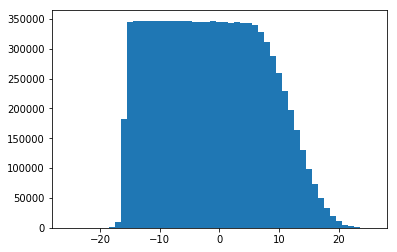

In [5]:
simulation.plotOnlyHistogram()

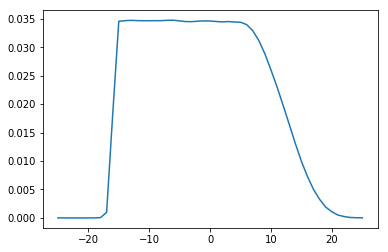

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02]
[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.01]
[0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [13]:
N=50
h = np.histogram(simulation.x, bins=np.linspace(-N/2-0.5, N/2+0.5, N+2), density=True)[0].tolist()
model.plot(h);
printNice(h)

In [35]:
from importlib import reload
reload(model);

[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
[0.01, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]


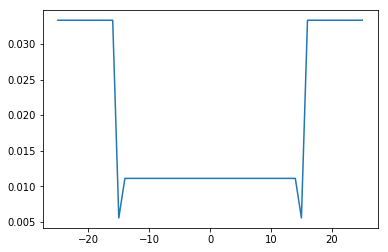

In [36]:
x = model.initialStationaryProbabilities(N=50, epsilon=0.1, d=15)
printNice(x)
model.plot(x);

In [37]:
r = model.initialRightProbabilities(N=50, epsilon=0.1, d=15)
print(r)

[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


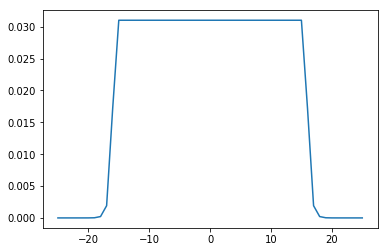

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02]
[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
[0.03, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [38]:
stationary = model.probabilities2Stationary(r)
model.plot(stationary)
printNice(stationary)

[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.49, 0.5, 0.48, 0.5, 0.46, 0.49, 0.41]
[0.5, 0.5, 0.5, 0.46, 0.46, 0.35, 0.4, 0.29, 0.35, 0.23]


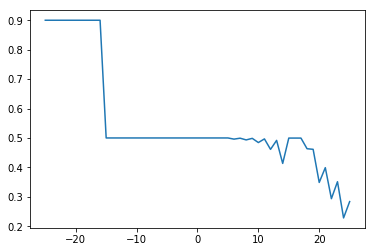

In [39]:
r = model.rightProbabilities(stationary, r, epsilon=0.1, d=15, tau=10)
printNice(r)
model.plot(r)

In [44]:
r = model.initialRightProbabilities(50, 15, 0.1)
for _ in range(100):
    stationary = model.probabilities2Stationary(r)
    for __ in range(20):
        r = model.rightProbabilities(stationary, r, epsilon=0.1, d=15, tau=10)

[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.49, 0.49, 0.47, 0.48, 0.44]
[0.45, 0.45, 0.48, 0.38, 0.4, 0.31, 0.34, 0.28, 0.31, 0.24]


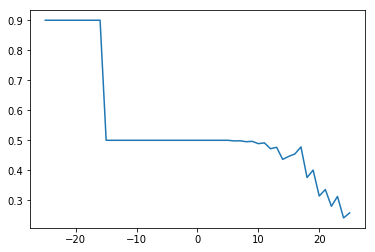

In [45]:
printNice(r)
model.plot(r);

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02]
[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]
[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02]
[0.02, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0]


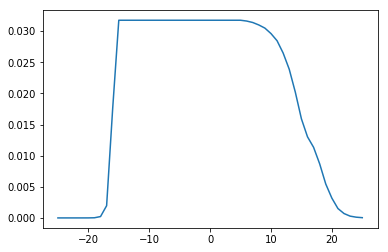

In [46]:
stationary = model.probabilities2Stationary(r)
printNice(stationary)
model.plot(stationary)

In [43]:
y = np.linspace(-N/2, N/2, num=N+1)
np.dot(stationary, y)

-0.1808997051114648